#  1) Import Libraries


In [586]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score


# 2) Read Dataset


In [587]:
traffic_Dataset = pd.read_csv('TrafficTwoMonth.csv')
traffic_Dataset

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


# 3) Data Preprocessing

### 3.1) Describe the dataset

In [588]:
traffic_Dataset.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


### 3.2) Dataset Information

In [589]:
traffic_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


### 3.3) Createing a midday column

In [590]:
traffic_Dataset['midday'] = ''  

for i in range(len(traffic_Dataset['Time'])):
    
    if traffic_Dataset['Time'][i][-2:] == 'AM':
        traffic_Dataset.loc[i, 'midday'] = 'AM'
        
    elif traffic_Dataset['Time'][i][-2:] == 'PM':
        traffic_Dataset.loc[i, 'midday'] = 'PM'
              
traffic_Dataset['Time'] = traffic_Dataset['Time'].str[:-2]

traffic_Dataset

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,12:00:00,10,Tuesday,13,2,2,24,41,normal,AM
1,12:15:00,10,Tuesday,14,1,1,36,52,normal,AM
2,12:30:00,10,Tuesday,10,2,2,32,46,normal,AM
3,12:45:00,10,Tuesday,10,2,2,36,50,normal,AM
4,1:00:00,10,Tuesday,11,2,1,34,48,normal,AM
...,...,...,...,...,...,...,...,...,...,...
5947,10:45:00,9,Thursday,16,3,1,36,56,normal,PM
5948,11:00:00,9,Thursday,11,0,1,30,42,normal,PM
5949,11:15:00,9,Thursday,15,4,1,25,45,normal,PM
5950,11:30:00,9,Thursday,16,5,0,27,48,normal,PM


### 3.4) Visualize the dataset information

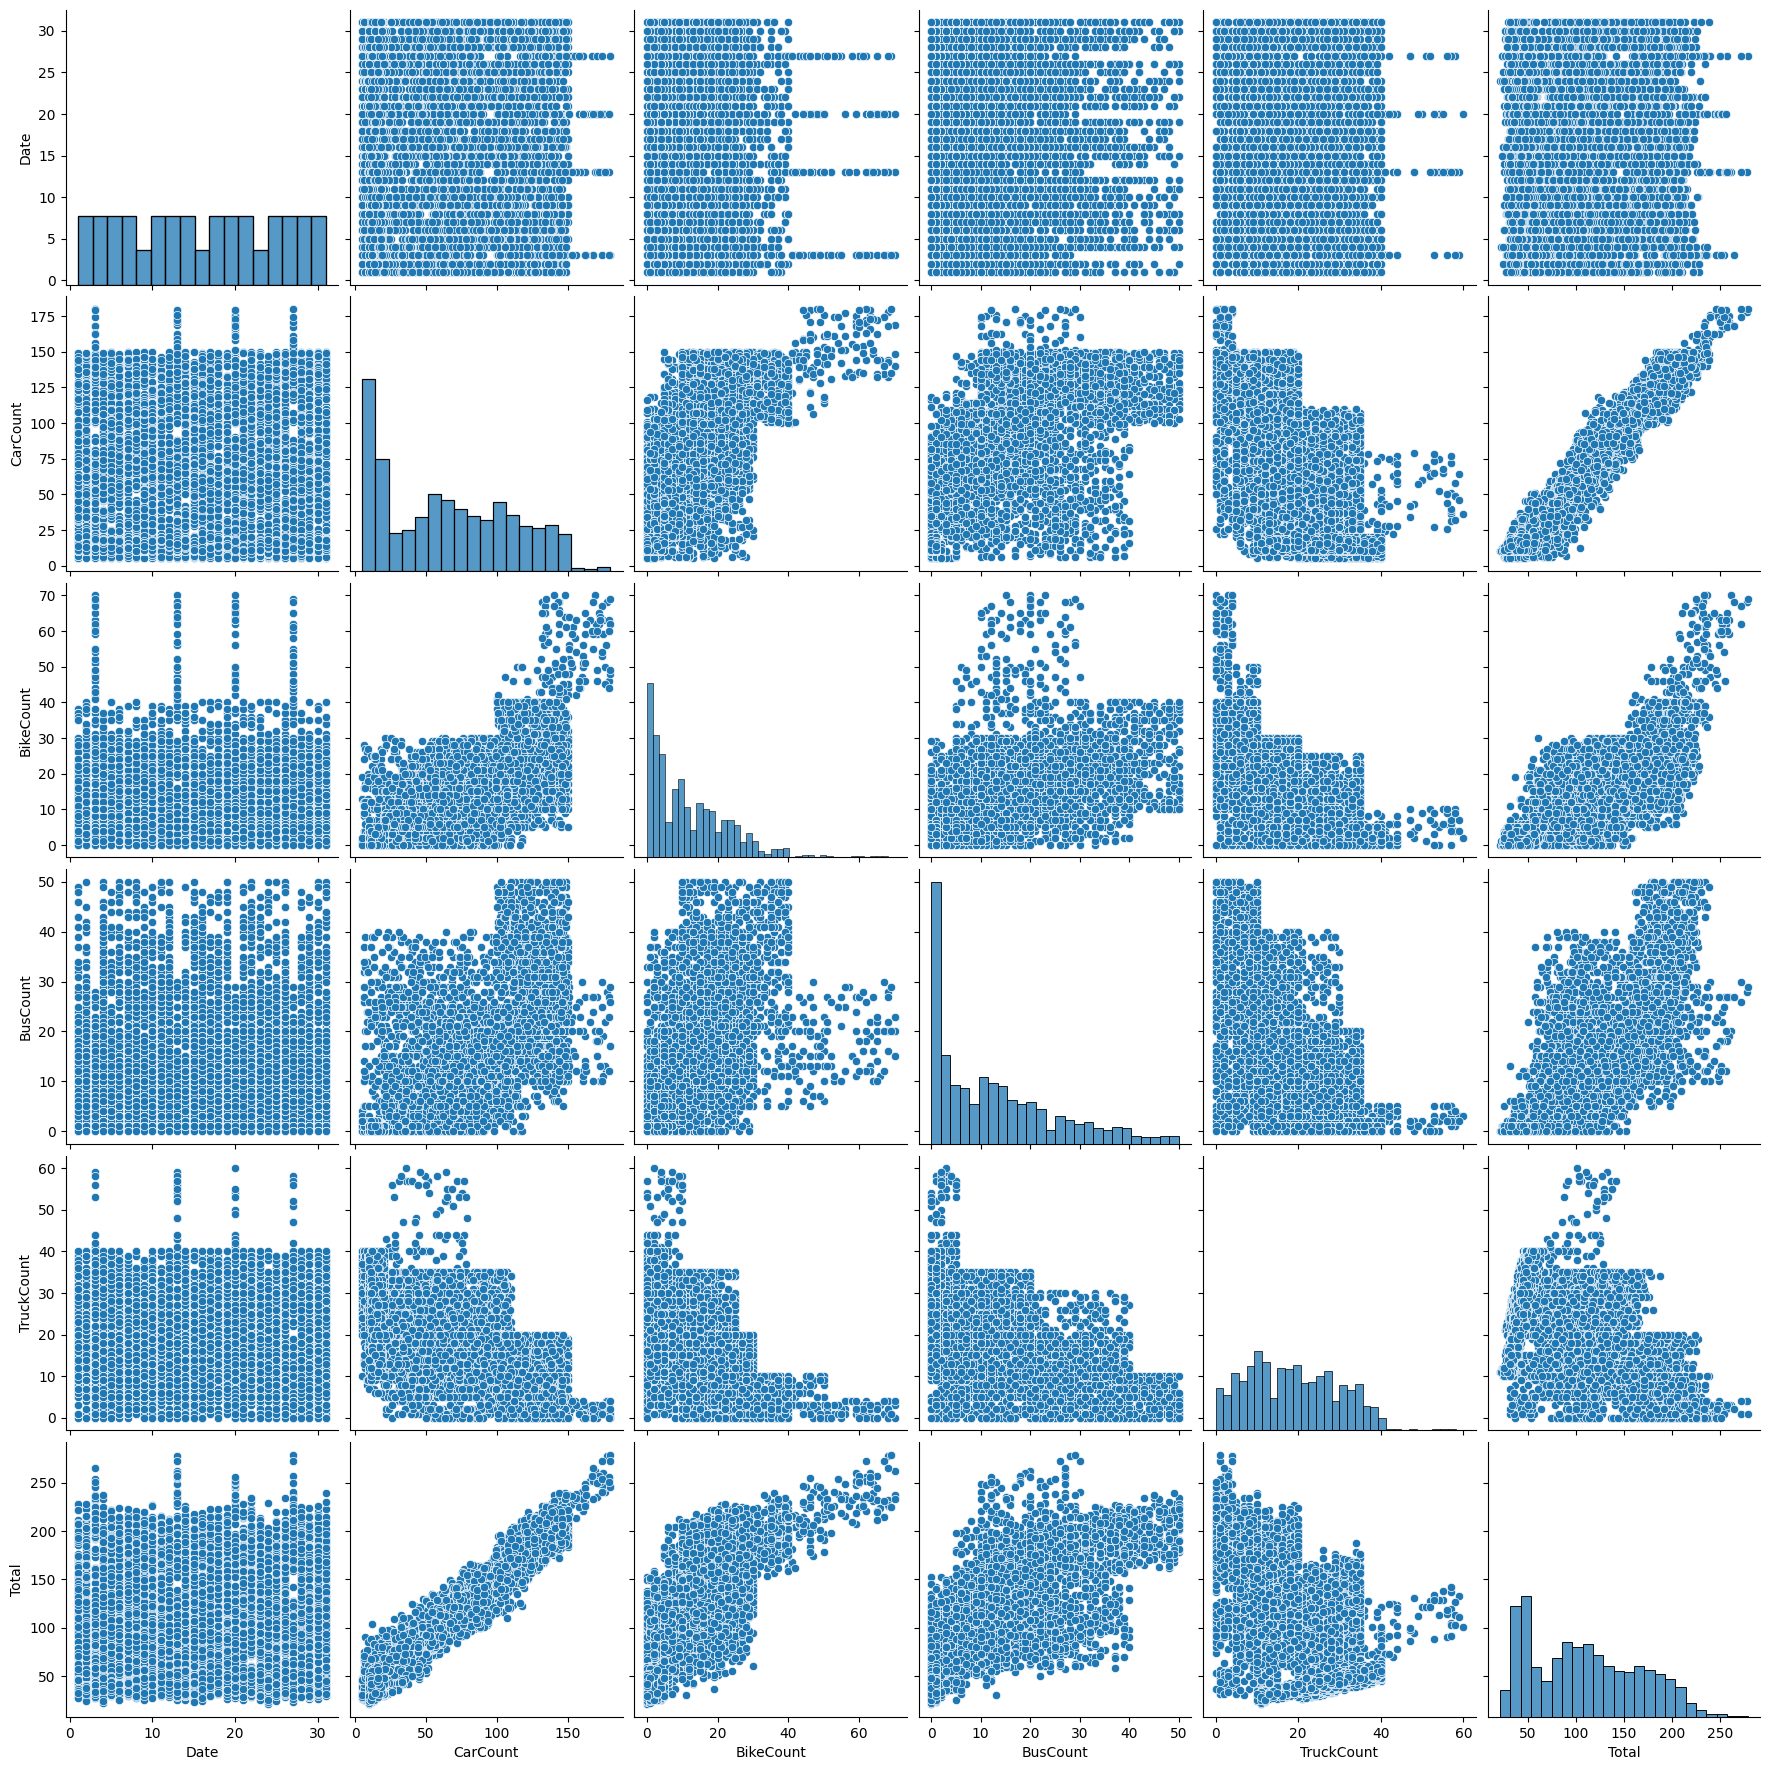

In [591]:
numeric_values = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
sns.pairplot(traffic_Dataset[numeric_values], height=3)

# 4) Feature Engineering

### 4.1) Display the Time in seconds

In [592]:
traffic_Dataset['Time'] = pd.to_datetime(traffic_Dataset['Time']).dt.hour * 3600 + \
                     pd.to_datetime(traffic_Dataset['Time']).dt.minute * 60 + \
                     pd.to_datetime(traffic_Dataset['Time']).dt.second

traffic_Dataset

/var/folders/p6/cqrq1pln5m7_p59dpvj1s5pr0000gn/T/ipykernel_16739/2342400717.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_Dataset['Time'] = pd.to_datetime(traffic_Dataset['Time']).dt.hour * 3600 + \
/var/folders/p6/cqrq1pln5m7_p59dpvj1s5pr0000gn/T/ipykernel_16739/2342400717.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(traffic_Dataset['Time']).dt.minute * 60 + \
/var/folders/p6/cqrq1pln5m7_p59dpvj1s5pr0000gn/T/ipykernel_16739/2342400717.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(traffic_Dataset['Time']).dt.second


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,43200,10,Tuesday,13,2,2,24,41,normal,AM
1,44100,10,Tuesday,14,1,1,36,52,normal,AM
2,45000,10,Tuesday,10,2,2,32,46,normal,AM
3,45900,10,Tuesday,10,2,2,36,50,normal,AM
4,3600,10,Tuesday,11,2,1,34,48,normal,AM
...,...,...,...,...,...,...,...,...,...,...
5947,38700,9,Thursday,16,3,1,36,56,normal,PM
5948,39600,9,Thursday,11,0,1,30,42,normal,PM
5949,40500,9,Thursday,15,4,1,25,45,normal,PM
5950,41400,9,Thursday,16,5,0,27,48,normal,PM


### 4.2) Normalize and encode the data

In [593]:
features = traffic_Dataset.drop(['Traffic Situation'], axis=1)
target = traffic_Dataset['Traffic Situation']

numeric_features = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

# scaler = MinMaxScaler()
scaler = StandardScaler()

features[numeric_features] = scaler.fit_transform(features[numeric_features])

le_features = LabelEncoder()
features['midday'] = le_features.fit_transform(features['midday'])
features['Day of the week'] = le_features.fit_transform(features['Day of the week'])

le_target = LabelEncoder()
target = le_target.fit_transform(target)

normalized_encoded_data = pd.concat([features, pd.Series(target, name='Traffic Situation')], axis=1)

traffic_Dataset = normalized_encoded_data

traffic_Dataset

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,1.479781,-0.670820,5,-1.171975,-0.880773,-0.873269,0.487929,-1.217351,0,3
1,1.551966,-0.670820,5,-1.149626,-0.967451,-0.953290,1.581600,-1.020893,0,3
2,1.624150,-0.670820,5,-1.239021,-0.880773,-0.873269,1.217043,-1.128052,0,3
3,1.696335,-0.670820,5,-1.239021,-0.880773,-0.873269,1.581600,-1.056613,0,3
4,-1.696335,-0.670820,5,-1.216672,-0.880773,-0.953290,1.399322,-1.092333,0,3
...,...,...,...,...,...,...,...,...,...,...
5947,1.118859,-0.782624,4,-1.104929,-0.794095,-0.953290,1.581600,-0.949454,1,3
5948,1.191043,-0.782624,4,-1.216672,-1.054129,-0.953290,1.034765,-1.199492,1,3
5949,1.263228,-0.782624,4,-1.127278,-0.707418,-0.953290,0.579068,-1.145912,1,3
5950,1.335412,-0.782624,4,-1.104929,-0.620740,-1.033312,0.761347,-1.092333,1,3


### 4.3) Split the data into train and test for Decision Tree

In [594]:
x = traffic_Dataset.drop(['Traffic Situation'], axis=1)
y = traffic_Dataset['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4761, 9), (1191, 9), (4761,), (1191,))

# 5) Model Building Decision Tree

In [595]:
from sklearn.metrics import classification_report, confusion_matrix

decisionTree = DecisionTreeClassifier()

decisionTree.fit(X_train, y_train)

y_pred = decisionTree.predict(X_test)

print('Nr. of predictions: \n', y_pred.size)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}", '\n')

# print(confusion_matrix(y_test, y_pred), '\n')

print(classification_report(y_test, y_pred)) 

Nr. of predictions: 
 1191
Accuracy: 0.998320738874895 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       216
           1       0.99      0.99      0.99        81
           2       1.00      1.00      1.00       146
           3       1.00      1.00      1.00       748

    accuracy                           1.00      1191
   macro avg       1.00      1.00      1.00      1191
weighted avg       1.00      1.00      1.00      1191



### 5.1) Print the Decision Tree

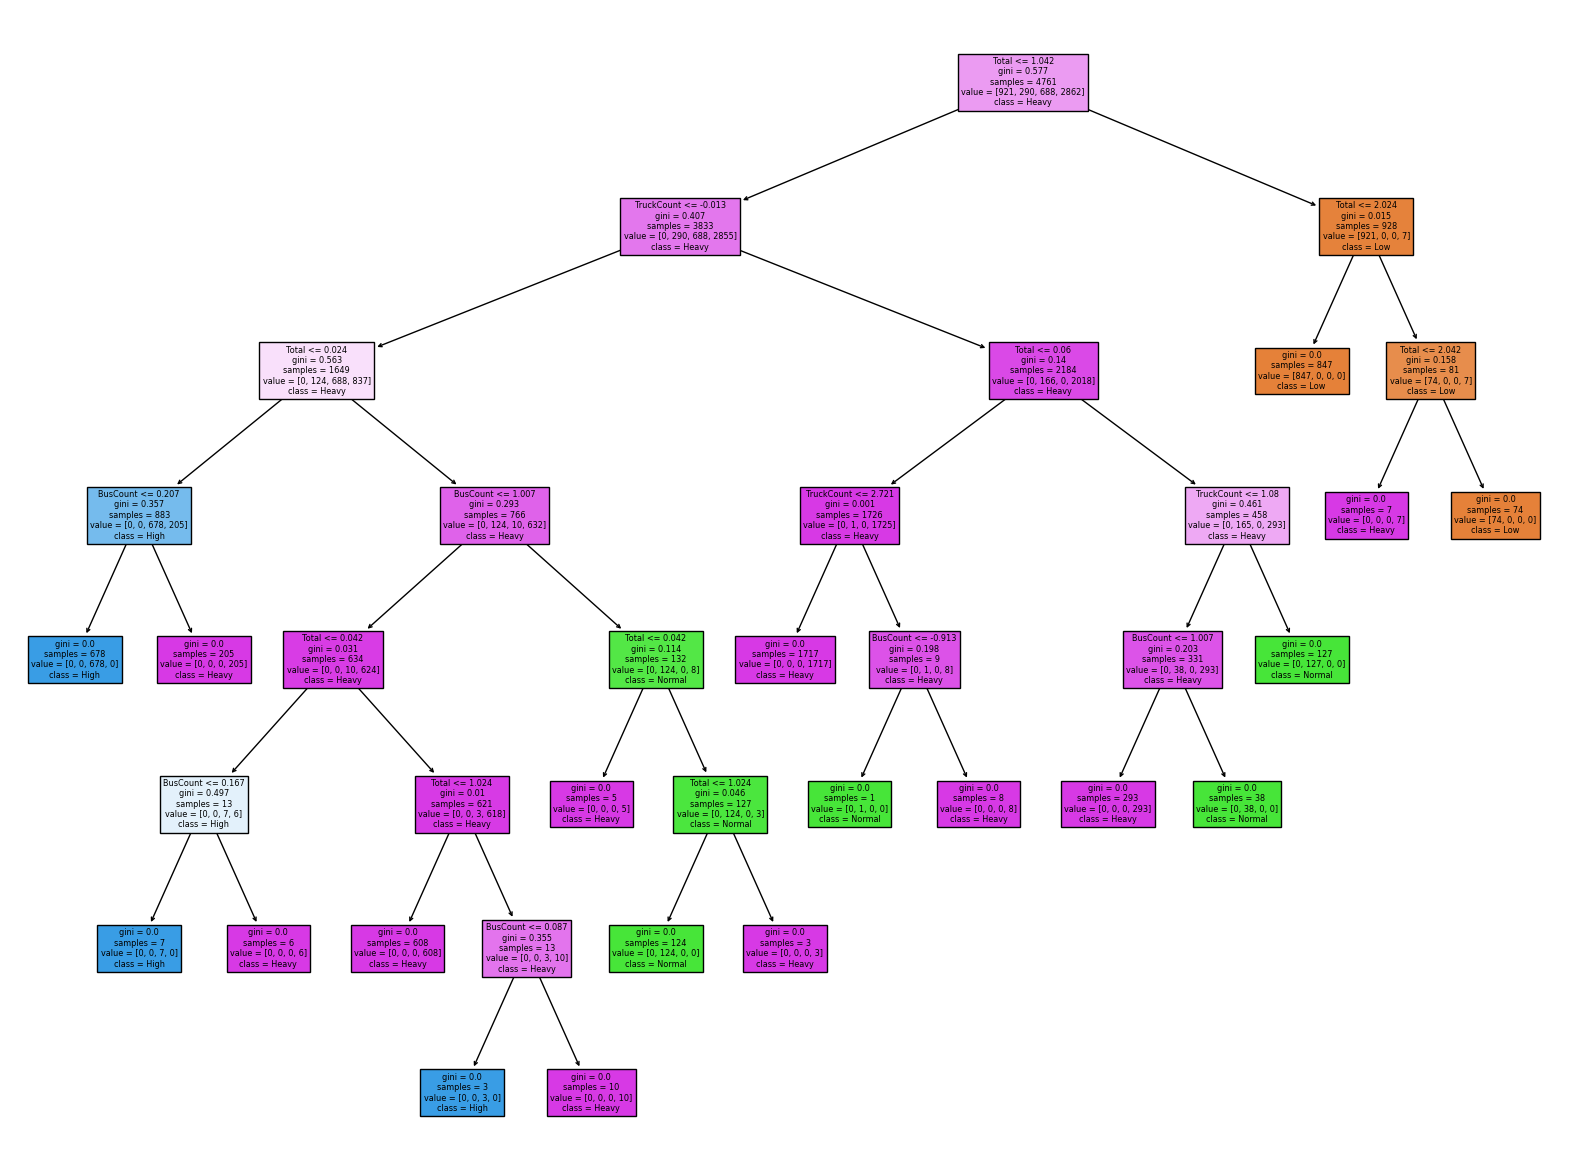

In [596]:
## print the decision tree
from sklearn import tree

fig = plt.figure(figsize=(20,15))
_ = tree.plot_tree(decisionTree, 
                   feature_names=X_train.columns,  
                   class_names= ['Low', 'Normal', 'High', 'Heavy'],
                   filled=True)

# 6) Model Building K-Means

In [597]:
from sklearn.metrics import silhouette_score

scaler = MinMaxScaler()
# scaler = StandardScaler()

features[numeric_features] = scaler.fit_transform(features[numeric_features])

normalized_encoded_data = pd.concat([features, pd.Series(target, name='Traffic Situation')], axis=1)

traffic_Dataset = normalized_encoded_data


kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

traffic_Dataset = traffic_Dataset.drop(['Time', 'Day of the week', 'midday', 'Date', 'BikeCount'], axis=1)
traffic_Dataset

,CarCount,BusCount,TruckCount,Total,Traffic Situation
0,0.045714,0.04,0.400000,0.077519,3
1,0.051429,0.02,0.600000,0.120155,3
2,0.028571,0.04,0.533333,0.096899,3
3,0.028571,0.04,0.600000,0.112403,3
4,0.034286,0.02,0.566667,0.104651,3
...,...,...,...,...,...
5947,0.062857,0.02,0.600000,0.135659,3
5948,0.034286,0.02,0.500000,0.081395,3
5949,0.057143,0.02,0.416667,0.093023,3
5950,0.062857,0.00,0.450000,0.104651,3


In [598]:
labels = kmeans.fit_predict(traffic_Dataset)


print(f"Silhouette score after feature selecting: {silhouette_score(traffic_Dataset, labels)}")

Silhouette score after feature selecting: 0.6432417572895976
